# 6.1 이미지 분류를 위한 신경망

## 6.1.1 LeNet-5

In [1]:
# 필요한 라이브러리 호출

%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Dropout

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# LeNet-5 클래스 생성

num_classes = 2
class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()
        
        self.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='relu',
                        input_shape=input_shape, padding='same'))
        self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='relu',
                        padding='valid'))
        self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='relu'))
        self.add(Dense(84, activation='relu'))
        self.add(Dense(nb_classes, activation='softmax'))
        
        self.compile(optimizer='adam',
                     loss=categorical_crossentropy,
                     metrics=['accuracy'])

In [3]:
# LeNet-5 모델 생성

model = LeNet((100,100,3), num_classes)
model.summary()

Metal device set to: Apple M1
Model: "le_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 50, 50, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 23, 23, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8464)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               1015800   
_________________________________________________________________
dense_1 (Dense)              (

2022-05-12 10:48:26.865004: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-12 10:48:26.865374: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
# 파라미터 초기화 및 데이터 호출

EPOCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = 'data/chap06/catanddog/train/'
valid_dir = 'data/chap06/catanddog/validation/'

In [5]:
# 이미지 데이터 증가

train = ImageDataGenerator(
                rescale=1./255,
                rotation_range=10,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.1,
                zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),
                                            color_mode='rgb',
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode='categorical')

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size=(image_height, image_width),
                                            color_mode='rgb',
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode='categorical')

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [11]:
# 텐서보드에서 모델 훈련 과정 살펴보기

log_dir = 'logs/log6-1/'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,
                                                      histogram_freq=1, profile_batch=0)

model.fit(train_generator,
          epochs=EPOCHS,
          steps_per_epoch=train_num // BATCH_SIZE,
          validation_data=valid_generator,
          validation_steps=valid_num // BATCH_SIZE,
          callbacks=[tensorboard_callback],
          verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0933 - accuracy: 0.9661 - val_loss: 1.5855 - val_accuracy: 0.6875
Epoch 2/100
12/12 [==============================] - 1s 77ms/step - loss: 0.1346 - accuracy: 0.9490 - val_loss: 1.6232 - val_accuracy: 0.6354
Epoch 3/100
12/12 [==============================] - 1s 76ms/step - loss: 0.1363 - accuracy: 0.9348 - val_loss: 1.7231 - val_accuracy: 0.5521
Epoch 4/100
12/12 [==============================] - 1s 76ms/step - loss: 0.0915 - accuracy: 0.9518 - val_loss: 1.6456 - val_accuracy: 0.5833
Epoch 5/100
12/12 [==============================] - 1s 76ms/step - loss: 0.1097 - accuracy: 0.9632 - val_loss: 1.7798 - val_accuracy: 0.6146
Epoch 6/100
12/12 [==============================] - 1s 79ms/step - loss: 0.1356 - accuracy: 0.9462 - val_loss: 1.7002 - val_accuracy: 0.5833
Epoch 7/100
12/12 [==============================] - 1s 78ms/step - loss: 0.2096 - accuracy: 0.9178 - val_loss: 1.4935 - val_accuracy: 0.6146
Epoch 

12/12 [==============================] - 1s 82ms/step - loss: 0.0295 - accuracy: 0.9887 - val_loss: 2.0115 - val_accuracy: 0.5938
Epoch 59/100
12/12 [==============================] - 1s 76ms/step - loss: 0.0357 - accuracy: 0.9858 - val_loss: 2.1031 - val_accuracy: 0.6042
Epoch 60/100
12/12 [==============================] - 1s 77ms/step - loss: 0.0399 - accuracy: 0.9887 - val_loss: 2.1154 - val_accuracy: 0.6042
Epoch 61/100
12/12 [==============================] - 1s 76ms/step - loss: 0.0369 - accuracy: 0.9830 - val_loss: 1.9673 - val_accuracy: 0.6250
Epoch 62/100
12/12 [==============================] - 1s 77ms/step - loss: 0.0212 - accuracy: 0.9915 - val_loss: 2.2346 - val_accuracy: 0.6458
Epoch 63/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0283 - accuracy: 0.9943 - val_loss: 2.2198 - val_accuracy: 0.6667
Epoch 64/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0463 - accuracy: 0.9943 - val_loss: 2.1771 - val_accuracy: 0.6250
Epoch 65/100

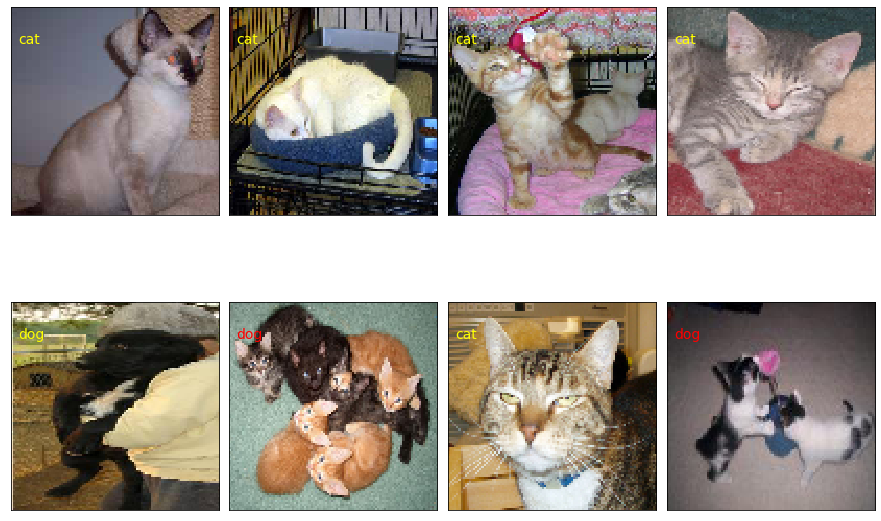

In [14]:
# 이미지 데이터셋 분류에 대한 예측

class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = np.argmax(model.predict(validation), axis=-1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

## 6.1.2 AlexNet

In [18]:
# 필요한 라이브러리 호출

%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [21]:
# 모델 생성

num_classes = 2
class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()
        
        self.add(Conv2D(96, kernel_size=(11,11), strides=4,
                        padding='valid', activation='relu',
                        input_shape=input_shape,
                        kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),
                              padding='valid', data_format='channels_last'))
        
        self.add(Conv2D(256, kernel_size=(5,5), strides=1,
                        padding='same', activation='relu',
                        input_shape=input_shape,
                        kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),
                              padding='valid', data_format='channels_last'))
        
        self.add(Conv2D(384, kernel_size=(3,3), strides=1,
                        padding='same', activation='relu',
                        input_shape=input_shape,
                        kernel_initializer='he_normal'))
        
        self.add(Conv2D(384, kernel_size=(3,3), strides=1,
                        padding='same', activation='relu',
                        input_shape=input_shape,
                        kernel_initializer='he_normal'))
        
        self.add(Conv2D(256, kernel_size=(3,3), strides=1,
                        padding='same', activation='relu',
                        input_shape=input_shape,
                        kernel_initializer='he_normal'))
        
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),
                              padding='valid', data_format='channels_last'))
        
        self.add(Flatten())
        self.add(Dense(4096, activation='relu'))
        self.add(Dense(4096, activation='relu'))
        self.add(Dense(1000, activation='relu'))
        self.add(Dense(num_classes, activation='softmax'))
        
        self.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [22]:
# 모델 생성

model = AlexNet((100,100,3), num_classes)
model.summary()

Model: "alex_net_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 23, 23, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 96)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 5, 5, 384)         885120    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 5, 5, 384)         1327488   
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 5, 5, 256)         8

In [23]:
# 데이터 호출 및 데이터셋 전처리(증가)

EPOCHS=100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = 'data/chap06/catanddog/train/'
valid_dir = 'data/chap06/catanddog/validation/'

train = ImageDataGenerator(
                rescale=1./255,
                rotation_range=10,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.1,
                zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),
                                            color_mode='rgb',
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode='categorical')

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size=(image_height, image_width),
                                            color_mode='rgb',
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode='categorical')

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [24]:
# 텐서보드 설정 및 모델 훈련

log_dir = 'logs/log6-2'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,
                                                      histogram_freq=1, profile_batch=0)

model.fit(train_generator,
          epochs=EPOCHS,
          steps_per_epoch=train_num // BATCH_SIZE,
          validation_data=valid_generator,
          validation_steps=valid_num // BATCH_SIZE,
          callbacks=[tensorboard_callback],
          verbose=1)

Epoch 1/100


2022-05-12 11:29:54.128819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 2s 129ms/step - loss: 11.5204 - accuracy: 0.5127 - val_loss: 0.6930 - val_accuracy: 0.5000


2022-05-12 11:29:56.162303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
12/12 [==============================] - 1s 84ms/step - loss: 0.6958 - accuracy: 0.5099 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/100
12/12 [==============================] - 1s 88ms/step - loss: 0.6942 - accuracy: 0.4714 - val_loss: 0.6929 - val_accuracy: 0.5104
Epoch 4/100
12/12 [==============================] - 1s 84ms/step - loss: 0.6934 - accuracy: 0.5411 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 5/100
12/12 [==============================] - 1s 86ms/step - loss: 0.6941 - accuracy: 0.5354 - val_loss: 0.7009 - val_accuracy: 0.4896
Epoch 6/100
12/12 [==============================] - 1s 86ms/step - loss: 0.6967 - accuracy: 0.4929 - val_loss: 0.6923 - val_accuracy: 0.5104
Epoch 7/100
12/12 [==============================] - 1s 84ms/step - loss: 0.6944 - accuracy: 0.5241 - val_loss: 0.7563 - val_accuracy: 0.4896
Epoch 8/100
12/12 [==============================] - 1s 84ms/step - loss: 0.6964 - accuracy: 0.5156 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 

12/12 [==============================] - 1s 84ms/step - loss: 0.6922 - accuracy: 0.5212 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 60/100
12/12 [==============================] - 1s 88ms/step - loss: 0.6919 - accuracy: 0.5269 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 61/100
12/12 [==============================] - 1s 90ms/step - loss: 0.6934 - accuracy: 0.5099 - val_loss: 0.6944 - val_accuracy: 0.4896
Epoch 62/100
12/12 [==============================] - 1s 85ms/step - loss: 0.7111 - accuracy: 0.5212 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 63/100
12/12 [==============================] - 1s 81ms/step - loss: 0.6919 - accuracy: 0.5269 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 64/100
12/12 [==============================] - 1s 86ms/step - loss: 0.6962 - accuracy: 0.5326 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 65/100
12/12 [==============================] - 1s 85ms/step - loss: 0.6984 - accuracy: 0.5439 - val_loss: 0.6948 - val_accuracy: 0.4896
Epoch 66/100

2022-05-12 11:34:05.485568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


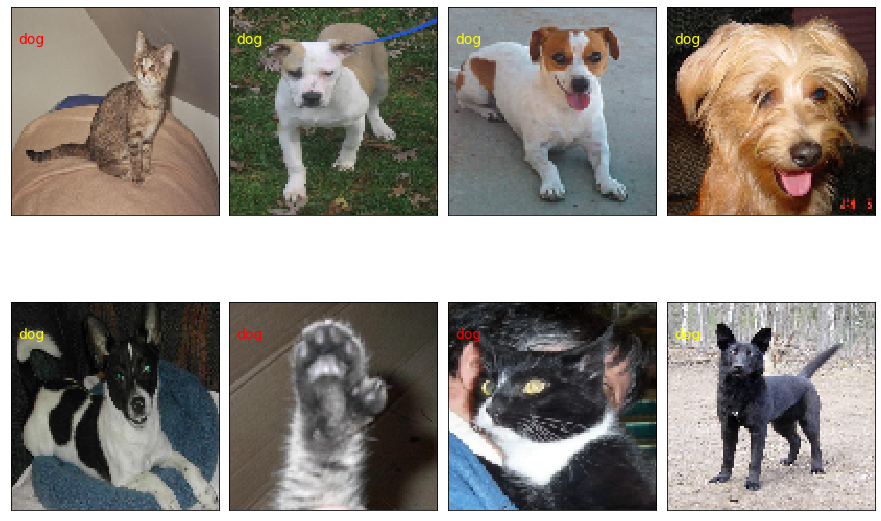

In [25]:
# 분류에 대한 예측

class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = np.argmax(model.predict(validation), axis=-1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

## 6.1.3 VGGNet

In [26]:
!pip install opencv-python

In [27]:
# 필요한 라이브러리 호출

%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [30]:
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()
        
        self.add(Conv2D(64, kernel_size=(3,3), padding='same',
                        activation='relu', input_shape=input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        
        self.add(Conv2D(128, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        
        self.add(Conv2D(256, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        
        self.add(Flatten())
        self.add(Dense(4096, activation='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(1000, activation='softmax'))
        
        self.compile(optimizer=tf.keras.optimizers.Adam(0.003),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [31]:
# VGG19 모델 출력

model = VGG19(input_shape=(224,224,3))
model.summary()

Model: "vg_g19_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 56, 56, 256)       295

In [32]:
model.load_weights('data/chap06/vgg19_weights_tf_dim_ordering_tf_kernels.h5')
classes = {282: 'cat', 
           681: 'notebook, notebook computer',
           970: 'alp'}

Text(0.5, 1.0, 'notebook, notebook computer')

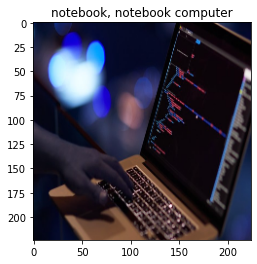

In [39]:
# 이미지 호출 및 예측

image1 = cv2.imread('data/chap06/labtop.jpg')
# image1 = cv2.imread('data/chap06/starrynight.jpeg')
# image1 = cv2.imread('data/chap06/cat.jpg')
image1 = cv2.resize(image1, (224,224))
plt.figure()
plt.imshow(image1)
image1 = image1[np.newaxis, :]
predicted_value = np.argmax(model.predict(image1), axis=-1)
plt.title(classes[predicted_value[0]])

## 6.1.4 GoogLeNet

## 6.1.5 ResNet

In [41]:
# Identity Block

def res_identity(x, filters):
    x_skip = x
    f1, f2 = filters
    
    x = Conv2D(f1, kernel_size=(1,1), strides=(1,1), padding='valid',
               kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)
    
    x = Conv2D(f1, kernel_size=(3,3), strides=(1,1), padding='same',
               kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)
    
    x = Conv2D(f2, kernel_size=(1,1), strides=(1,1), padding='valid',
               kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    
    x = Add()([x, x_skip])
    x = Activation(activations.relu)(x)
    
    return x

In [42]:
# Convolutional Block

def res_conv(x, s, filters):
    x_skip = x
    f1, f2 = filters
    
    x = Conv2D(f1, kernel_size=(1,1), strides=(s,s), padding='valid',
               kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)
    
    x = Conv2D(f1, kernel_size=(3,3), strides=(1,1), padding='same',
               kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)
    
    x = Conv2D(f2, kernel_size=(1,1), strides=(1,1), padding='valid',
               kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    
    x_skip = Conv2D(f2, kernel_size=(1,1), strides=(s,s), padding='valid',
                    kernel_regularizer=l2(0.001))(x_skip)
    x_skip = BatchNormalization()(x_skip)
    
    x = Add()([x, x_skip])
    x = Activation(activations.relu)(x)
    
    return x

# 6.2 객체 인식을 위한 신경망

## 6.2.1 R-CNN

In [ ]:
# 1. 초기 영역 생성 (sub-segmentation)
# 2. 작은 영역의 통합
# 3. 후보 영역 생성

## 6.2.2 Spatial Pyramid Pooling

In [ ]:
# 입력 이미지의 크기에 관계없이 합성곱층을 통과시키고, 완전연결층에 전달되기 전에 특성 맵들을 동일한 크기로 조절해 주는 풀링층을 적용하는 기법
# 원본 이미지의 특징이 훼손되지 않는 특성 맵을 얻을 수 있음

## 6.2.3 Fast R-CNN

In [ ]:
# ROI 풀링 : 크기가 다른 특성 맵의 영역마다 Stride를 다르게 최대 풀링을 적용하여 결괏값 크기를 동일하게 맞추는 방법

## 6.2.4 Faster R-CNN

In [ ]:
# Region Proposal Network (RPN) 추가

# 6.3 이미지 분할을 위한 신경망

## 6.3.1 Fully Convolutional Network (FCN)

In [ ]:
# Fully Connected Network로 변환하면서 공간에 대한 정보가 사라진다는 단점을 보완
# FCN을 1x1 Convolutional Network로 대체

## 6.3.2 Convolutional & Deconvolutional Network

In [ ]:
# 여러 단계의 합성곱층과 풀링층을 거치면서 해상도가 낮아진다는 FCN의 단점을 보완
# Deconvolutional Network이란?
# 1. 각각의 픽셀 주위에 Zero-paddin을 추가
# 2. 이렇게 패딩된 것에 합성곱 연산을 수행

## 6.3.3 U-Net

In [ ]:
inputs = layers.Input(shape=(572,572,1))

""" 수축 경로 """
c0 = layers.Conv2D(64, activation='relu', kernel_size=3)(inputs)
c1 = layers.Conv2D(64, activation='relu', kernel_size=3)(c0) # 확장 경로와 연결하기 위한 계층
c2 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid')(c1)

c3 = layers.Conv2D(128, activation='relu', kernel_size=3)(c2)
c4 = layers.Conv2D(128, activation='relu', kernel_size=3)(c3) # 확장 경로와 연결하기 위한 계층
c5 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid')(c4)

c6 = layers.Conv2D(256, activation='relu', kernel_size=3)(c5)
c7 = layers.Conv2D(256, activation='relu', kernel_size=3)(c6) # 확장 경로와 연결하기 위한 계층
c8 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid')(c7)

c9 = layers.Conv2D(512, activation='relu', kernel_size=3)(c8)
c10 = layers.Conv2D(512, activation='relu', kernel_size=3)(c9) # 확장 경로와 연결하기 위한 계층
c11 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid')(c10)

c12 = layers.Conv2D(1024, activation='relu', kernel_size=3)(c11)
c13 = layers.Conv2D(1024, activation='relu', kernel_size=3, padding='valid')(c12)

""" 확장 경로 """

t01 = layers.Conv2DTranspose(512, kernel_size=2, strides=(2,2), activation='relu')(c13)
crop01 = layers.Cropping2D(cropping=(4,4))(c10)
concat01 = layers.concatenate([t01, crop01], axis=-1)

c14 = layers.Conv2D(512, activation='relu', kernel_size=3)(concat01)
c15 = layers.Conv2D(512, activation='relu', kernel_size=3)(c14)

t02 = layers.Conv2DTranspose(256, kernel_size=2, strides=(2,2), activation='relu')(c15)
crop02 = layers.Cropping2D(cropping=(16,16))(c7)
concat02 = layers.concatenate([t02, crop02], axis=-1)

c16 = layers.Conv2D(256, activation='relu', kernel_size=3)(concat02)
c17 = layers.Conv2D(256, activation='relu', kernel_size=3)(c16)

t03 = layers.Conv2DTranspose(128, kernel_size=2, strides=(2,2), activation='relu')(c17)
crop03 = layers.Cropping2D(cropping=(40,40))(c4)
concat03 = layers.concatenate([t03, crop03], axis=-1)

c18 = layers.Conv2D(128, activation='relu', kernel_size=3)(concat03)
c19 = layers.Conv2D(128, activation='relu', kernel_size=3)(c18)

t04 = layers.Conv2DTranspose(64, kernel_size=2, strides=(2,2), activation='relu')(c19)
crop04 = layers.Cropping2D(cropping=(88,88))(c1)
concat04 = layers.concatenate([t04, crop04], axis=-1)

c20 = layers.Conv2D(64, activation='relu', kernel_size=3)(concat04)
c21 = layers.Conv2D(64, activation='relu', kernel_size=3)(c20)

outputs = layers.Conv2D(2, kernel_size=1)(c21)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name='u-netmodel')

## 6.3.4 PSPNet (Pyramid Scene Parsing Network)

In [ ]:
# 1. 이미지 출력이 서로 다른 크기가 되도록 여러 차례 풀링을 합니다.
# 2. 이후 1x1 합성공을 사용하여 채널 개수를 조정합니다.
# 3. 모듈의 입력 크기에 맞게 특성 맵을 업 샘플링합니다.
# 4. 원래의 특성 맵과 생성한 새로운 특성 맵들을 병합합니다.

## 6.3.5 DeepLabv3/DeepLabv3+

In [ ]:
# Fully Connected Network의 단점을 보완하기 위해 Atrous Convolutional Network를 사용